In [1]:
base_dir = '../Datasets/cats_and_dogs_filtered/'
import os

train_dir = os.path.join(base_dir, 'train')
validation_dir = os.path.join(base_dir, 'validation')

# Directory with training cat/dog pictures
train_cats_dir = os.path.join(train_dir, 'cats')
train_dogs_dir = os.path.join(train_dir, 'dogs')

# Directory with validation cat/dog pictures
validation_cats_dir = os.path.join(validation_dir, 'cats')
validation_dogs_dir = os.path.join(validation_dir, 'dogs')

# 1) Without Augmentation


In [2]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# All images will be rescaled by 1./255
train_datagen = ImageDataGenerator(rescale=1./255)
test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.


In [3]:
import tensorflow as tf
from tensorflow.keras.optimizers import RMSprop

def create_model():
  '''Creates a CNN with 4 convolutional layers'''
  model = tf.keras.models.Sequential([
      tf.keras.layers.Conv2D(32, (3,3), activation='relu', input_shape=(150, 150, 3)),
      tf.keras.layers.MaxPooling2D(2, 2),
      tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Conv2D(128, (3,3), activation='relu'),
      tf.keras.layers.MaxPooling2D(2,2),
      tf.keras.layers.Flatten(),
      tf.keras.layers.Dense(512, activation='relu'),
      tf.keras.layers.Dense(1, activation='sigmoid')
  ])

  model.compile(loss='binary_crossentropy',
                optimizer=RMSprop(learning_rate=1e-4),
                metrics=['accuracy'])
  
  return model

In [4]:
# Constant for epochs
EPOCHS = 20

# Create a new model
model = create_model()

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Epoch 1/20
100/100 - 30s - loss: 0.6864 - accuracy: 0.5460 - val_loss: 0.6617 - val_accuracy: 0.6210 - 30s/epoch - 296ms/step
Epoch 2/20
100/100 - 27s - loss: 0.6366 - accuracy: 0.6280 - val_loss: 0.6699 - val_accuracy: 0.5950 - 27s/epoch - 272ms/step
Epoch 3/20
100/100 - 27s - loss: 0.5907 - accuracy: 0.6780 - val_loss: 0.6358 - val_accuracy: 0.6250 - 27s/epoch - 270ms/step
Epoch 4/20
100/100 - 28s - loss: 0.5572 - accuracy: 0.7060 - val_loss: 0.5725 - val_accuracy: 0.7030 - 28s/epoch - 281ms/step
Epoch 5/20
100/100 - 29s - loss: 0.5292 - accuracy: 0.7355 - val_loss: 0.5718 - val_accuracy: 0.7040 - 29s/epoch - 287ms/step
Epoch 6/20
100/100 - 29s - loss: 0.5065 - accuracy: 0.7590 - val_loss: 0.6042 - val_accuracy: 0.6790 - 29s/epoch - 287ms/step
Epoch 7/20
100/100 - 29s - loss: 0.4824 - accuracy: 0.7675 - val_loss: 0.5577 - val_accuracy: 0.7230 - 29s/epoch - 290ms/step
Epoch 8/20
100/100 - 31s - loss: 0.4486 - accuracy: 0.8020 - val_loss: 0.5450 - val_accuracy: 0.7330 - 31s/epoch - 309

In [6]:
import matplotlib.pyplot as plt

def plot_loss_acc(history):
  '''Plots the training and validation loss and accuracy from a history object'''
  acc = history.history['accuracy']
  val_acc = history.history['val_accuracy']
  loss = history.history['loss']
  val_loss = history.history['val_loss']

  epochs = range(len(acc))

  plt.plot(epochs, acc, 'bo', label='Training accuracy')
  plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
  plt.title('Training and validation accuracy')

  plt.figure()

  plt.plot(epochs, loss, 'bo', label='Training Loss')
  plt.plot(epochs, val_loss, 'b', label='Validation Loss')
  plt.title('Training and validation loss')
  plt.legend()

  plt.show()

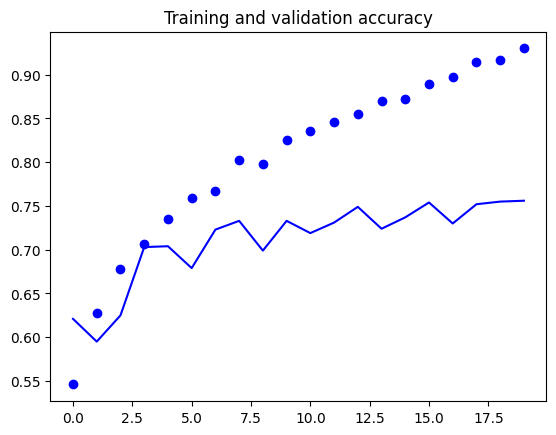

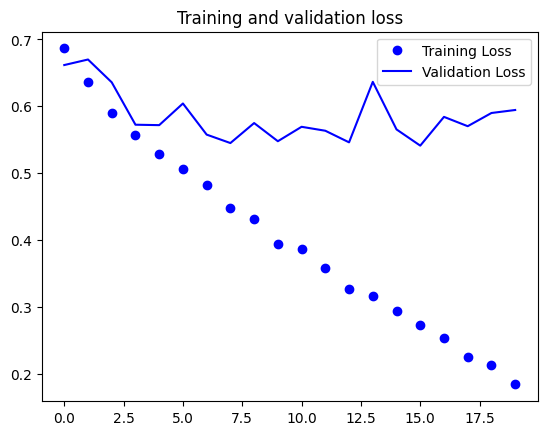

In [7]:
# Plot training results
plot_loss_acc(history)

# 2) New Model with augmentation

In [8]:
# Create new model
model_for_aug = create_model()

# This code has changed. Now instead of the ImageGenerator just rescaling
# the image, we also rotate and do other operations
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

test_datagen = ImageDataGenerator(rescale=1./255)

# Flow training images in batches of 20 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        train_dir,  # This is the source directory for training images
        target_size=(150, 150),  # All images will be resized to 150x150
        batch_size=20,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow validation images in batches of 20 using test_datagen generator
validation_generator = test_datagen.flow_from_directory(
        validation_dir,
        target_size=(150, 150),
        batch_size=20,
        class_mode='binary')

# Train the new model
history_with_aug = model_for_aug.fit(
      train_generator,
      steps_per_epoch=100,  # 2000 images = batch_size * steps
      epochs=EPOCHS,
      validation_data=validation_generator,
      validation_steps=50,  # 1000 images = batch_size * steps
      verbose=2)

Found 2000 images belonging to 2 classes.
Found 1000 images belonging to 2 classes.
Epoch 1/20
100/100 - 29s - loss: 0.6946 - accuracy: 0.5250 - val_loss: 0.6780 - val_accuracy: 0.5990 - 29s/epoch - 288ms/step
Epoch 2/20
100/100 - 29s - loss: 0.6804 - accuracy: 0.5650 - val_loss: 0.6563 - val_accuracy: 0.6230 - 29s/epoch - 286ms/step
Epoch 3/20
100/100 - 29s - loss: 0.6712 - accuracy: 0.5905 - val_loss: 0.6432 - val_accuracy: 0.6280 - 29s/epoch - 288ms/step
Epoch 4/20
100/100 - 29s - loss: 0.6568 - accuracy: 0.6080 - val_loss: 0.6745 - val_accuracy: 0.5800 - 29s/epoch - 286ms/step
Epoch 5/20
100/100 - 29s - loss: 0.6464 - accuracy: 0.6340 - val_loss: 0.6043 - val_accuracy: 0.6620 - 29s/epoch - 289ms/step
Epoch 6/20
100/100 - 30s - loss: 0.6281 - accuracy: 0.6430 - val_loss: 0.5904 - val_accuracy: 0.6830 - 30s/epoch - 301ms/step
Epoch 7/20
100/100 - 31s - loss: 0.6117 - accuracy: 0.6750 - val_loss: 0.5696 - val_accuracy: 0.7030 - 31s/epoch - 306ms/step
Epoch 8/20
100/100 - 33s - loss: 0

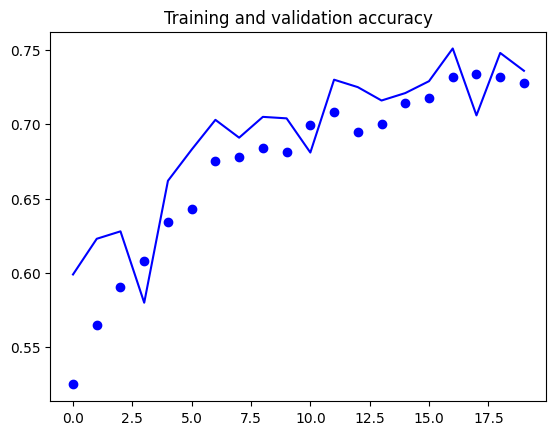

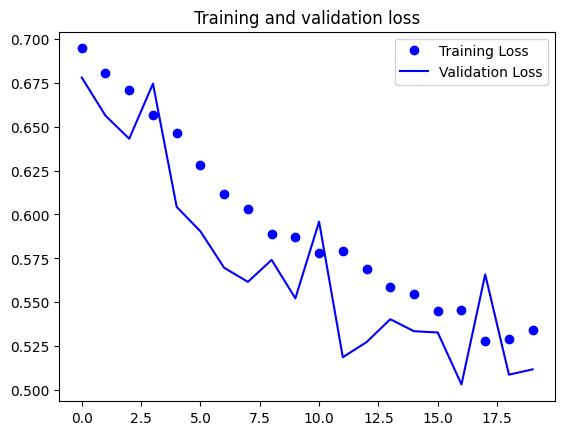

In [9]:
# Plot the results of training with data augmentation
plot_loss_acc(history_with_aug)

# 3) A Review with or without IA


In [4]:

import os
base_dir = "../Datasets/horse-or-human/"

# Directory with training horse pictures
train_horse_dir = os.path.join(base_dir,"training/horses")

# Directory with training human pictures
train_human_dir = os.path.join(base_dir,"training/humans")

# Directory with training horse pictures
validation_horse_dir = os.path.join(base_dir,"validation/horses")

# Directory with training human pictures
validation_human_dir = os.path.join(base_dir,"validation/humans")

In [6]:
import tensorflow as tf

# Build the model
model = tf.keras.models.Sequential([
    # Note the input shape is the desired size of the image 300x300 with 3 bytes color
    # This is the first convolution
    tf.keras.layers.Conv2D(16, (3,3), activation='relu', input_shape=(300, 300, 3)),
    tf.keras.layers.MaxPooling2D(2, 2),
    # The second convolution
    tf.keras.layers.Conv2D(32, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The third convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fourth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # The fifth convolution
    tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
    tf.keras.layers.MaxPooling2D(2,2),
    # Flatten the results to feed into a DNN
    tf.keras.layers.Flatten(),
    # 512 neuron hidden layer
    tf.keras.layers.Dense(512, activation='relu'),
    # Only 1 output neuron. It will contain a value from 0-1 where 0 for 1 class ('horses') and 1 for the other ('humans')
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [7]:
from tensorflow.keras.optimizers import RMSprop

# Set training parameters
model.compile(loss='binary_crossentropy',
              optimizer=RMSprop(learning_rate=1e-4),
              metrics=['accuracy'])

In [8]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

# Apply data augmentation
train_datagen = ImageDataGenerator(
      rescale=1./255,
      rotation_range=40,
      width_shift_range=0.2,
      height_shift_range=0.2,
      shear_range=0.2,
      zoom_range=0.2,
      horizontal_flip=True,
      fill_mode='nearest')

validation_datagen = ImageDataGenerator(rescale=1/255)

# Flow training images in batches of 128 using train_datagen generator
train_generator = train_datagen.flow_from_directory(
        '../Datasets/horse-or-human/training/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 150x150
        batch_size=128,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

# Flow training images in batches of 128 using train_datagen generator
validation_generator = validation_datagen.flow_from_directory(
        '../Datasets/horse-or-human/validation/',  # This is the source directory for training images
        target_size=(300, 300),  # All images will be resized to 300x300
        batch_size=32,
        # Since we use binary_crossentropy loss, we need binary labels
        class_mode='binary')

Found 1027 images belonging to 2 classes.
Found 256 images belonging to 2 classes.


In [9]:
# Constant for epochs
EPOCHS = 15

# Train the model
history = model.fit(
      train_generator,
      steps_per_epoch=8,  
      epochs=EPOCHS,
      verbose=1,
      validation_data = validation_generator,
      validation_steps=8)

Epoch 1/15
8/8 [==============================] - 37s 4s/step - loss: 0.6701 - accuracy: 0.5539 - val_loss: 0.7041 - val_accuracy: 0.5000
Epoch 2/15
8/8 [==============================] - 32s 4s/step - loss: 0.6381 - accuracy: 0.6474 - val_loss: 0.6593 - val_accuracy: 0.5234
Epoch 3/15
8/8 [==============================] - 31s 4s/step - loss: 0.6017 - accuracy: 0.6952 - val_loss: 0.8448 - val_accuracy: 0.5000
Epoch 4/15
8/8 [==============================] - 32s 4s/step - loss: 0.6065 - accuracy: 0.6541 - val_loss: 0.8635 - val_accuracy: 0.5000
Epoch 5/15
8/8 [==============================] - 32s 4s/step - loss: 0.5582 - accuracy: 0.7297 - val_loss: 0.7349 - val_accuracy: 0.5117
Epoch 6/15
8/8 [==============================] - 32s 4s/step - loss: 0.5442 - accuracy: 0.7286 - val_loss: 0.8164 - val_accuracy: 0.5078
Epoch 7/15
8/8 [==============================] - 34s 4s/step - loss: 0.5395 - accuracy: 0.7412 - val_loss: 0.7335 - val_accuracy: 0.5312
Epoch 8/15
8/8 [==================

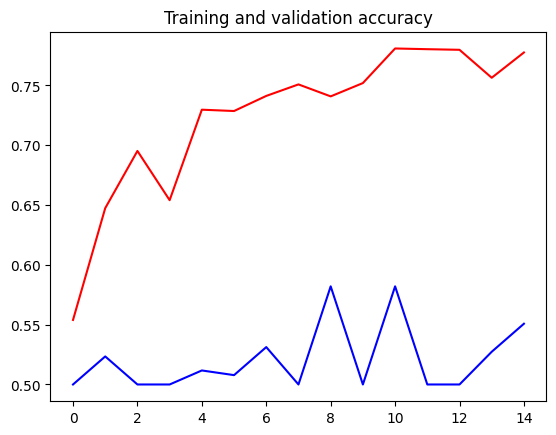

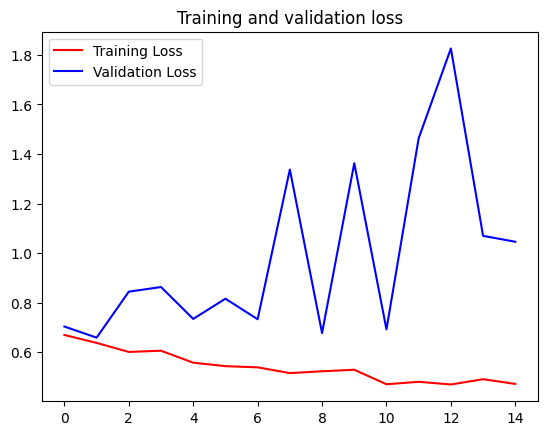

In [10]:
import matplotlib.pyplot as plt

# Plot the model results
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
loss = history.history['loss']
val_loss = history.history['val_loss']

epochs = range(len(acc))

plt.plot(epochs, acc, 'r', label='Training accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation accuracy')
plt.title('Training and validation accuracy')

plt.figure()

plt.plot(epochs, loss, 'r', label='Training Loss')
plt.plot(epochs, val_loss, 'b', label='Validation Loss')
plt.title('Training and validation loss')
plt.legend()

plt.show()

As you can see in the results, the preprocessing techniques used in augmenting the data did not help much in the results. The validation accuracy is fluctuating and not trending up like the training accuracy. This might be because the additional training data generated still do not represent the features in the validation data. For example, some human or horse poses in the validation set cannot be mimicked by the image processing techniques that ImageDataGenerator provides. 